In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
#world_cup = pd.read_csv('F:/python/worldcup_pre/results.csv/World Cup 2018 Dataset.csv', encoding='utf-8')
f = open('F:/python/worldcup_pre/results.csv/results.csv', encoding='utf-8')
results = pd.read_csv(f)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
winner = []
for i in range(len(results['home_team'])):
    if results['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#添加赢球队伍信息和净胜球数
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [4]:
#聚焦尼日利亚
df = results[(results['home_team'] == 'Nigeria') | (results['away_team'] == 'Nigeria')]
nigeria = df.iloc[:]
nigeria.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
2977,1949-10-08,Sierra Leone,Nigeria,0,2,Friendly,Freetown,Sierra Leone,False,Nigeria,2
3050,1950-05-28,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,False,Ghana,1
3219,1951-10-20,Nigeria,Ghana,5,0,Friendly,Lagos,Nigeria,False,Nigeria,5
3492,1953-10-11,Ghana,Nigeria,1,0,Friendly,Accra,Gold Coast,False,Ghana,1
3654,1954-10-30,Nigeria,Ghana,3,0,Friendly,Lagos,Nigeria,False,Nigeria,3


In [5]:
year = []
for row in nigeria['date']:
    year.append(int(row[:4]))
#取尼日利亚1930年以后的比赛
nigeria['match_year'] = year
nigeria_1930 = nigeria[nigeria.match_year >= 1930]
nigeria_1930.count()

date               548
home_team          548
away_team          548
home_score         548
away_score         548
tournament         548
city               548
country            548
neutral            548
winning_team       548
goal_difference    548
match_year         548
dtype: int64

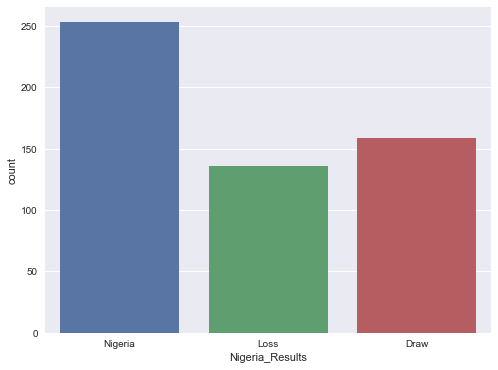

In [14]:
#尼日利亚比赛结果的可视化
wins = []
for row in nigeria_1930['winning_team']:
    if row != 'Nigeria' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf = pd.DataFrame(wins, columns=['Nigeria_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(8, 6)
sns.set(style='darkgrid')
sns.countplot(x='Nigeria_Results', data=winsdf)

In [6]:
#缩小世界杯球队的范围，便于预测
worldcup_teams = ['Australia', 'Iran', 'Japan', 'Korea Republic', 'Saudi Arabia', 'Egypt', 'Morocco', 
                             'Nigeria', 'Senegal', 'Tunisia', 'Costa Rica', 'Mexico', 'Panama', 'Argentina', 'Brazil', 'Colombia', 
                             'Peru', 'Uruguay', 'Belgium', 'Croatia', 'Denmark', 'England', 'France', 'Germany', 'Iceland', 'Poland', 'Portugal', 'Russia', 'Serbia', 'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21270
home_team          21270
away_team          21270
home_score         21270
away_score         21270
tournament         21270
city               21270
country            21270
neutral            21270
winning_team       21270
goal_difference    21270
dtype: int64

In [22]:
#去掉1930前的比赛，以及无用数据
year=[]
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year>=1930]
df_teams_1930.head()
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
10,England,Wales,False,England
11,England,Scotland,False,England


In [23]:
#Label: 
#Home team Win : 2
#Draw : 1
#Away team Win : 0
df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team, 'winning_team'] = 2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team'] =1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team'] = 0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,England,Wales,False,2
4,England,Scotland,False,2


In [26]:
#离散类别值没有意义，转化成连续值，one-hot方式
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
#划分X和Y
X = final.drop(['winning_team'], axis=1)
y = final['winning_team']
y = y.astype('int')
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("训练集准确率：" '%.3f' %(score))
print("测试集准确率：" '%.3f' % (score2))

训练集准确率：0.579
测试集准确率：0.562


In [58]:
#融合FIFA排名
#世界杯没有主客场
#排名更高的球队，更可能赢得比赛

ranking = pd.read_csv('F:/python/worldcup_pre/fifa_rankings.csv')
fixtures = pd.read_csv('F:/python/worldcup_pre/fixtures.csv')

In [59]:
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(1, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))
#小组赛阶段
fixtures = fixtures.iloc[:48, :]
fixtures.head()

,Round Number,second_position,first_position,Date,Location,Home Team,Away Team,Group,Result
0,1,70.0,66.0,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,Saudi Arabia,Group A,NaN
1,1,17.0,46.0,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,Uruguay,Group A,NaN
2,1,36.0,42.0,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,Iran,Group B,NaN
3,1,8.0,4.0,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,Spain,Group B,NaN
4,1,40.0,7.0,16/06/2018 13:00,Kazan Arena,France,Australia,Group C,NaN


In [60]:
#根据每支球队的排名，将球队添加到新的预测数据集
pred_set = []
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})

pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Saudi Arabia,Russia,None
1,Egypt,Uruguay,None
2,Morocco,Iran,None
3,Spain,Portugal,None
4,Australia,France,None


In [61]:
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

#丢失的column
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

#移除赢球队伍
pred_set = pred_set.drop(['winning_team'], axis=1)
pred_set.head()

,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#小组赛
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + ' and ' + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner:" + backup_pred_set.iloc[i, 1])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner:" + backup_pred_set.iloc[i, 0])
    print(backup_pred_set.iloc[i ,1] + "取胜的预测概率为：" + '%.3f' %(logreg.predict_proba(pred_set)[i][2]))
    print('平局的概率为：', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print(backup_pred_set.iloc[i ,0] + "取胜的预测概率为：" + '%.3f' %(logreg.predict_proba(pred_set)[i][0]))

Russia and Saudi Arabia
Winner:Russia
Russia取胜的预测概率为：0.724
平局的概率为： 0.206
Saudi Arabia取胜的预测概率为：0.070
Uruguay and Egypt
Winner:Uruguay
Uruguay取胜的预测概率为：0.642
平局的概率为： 0.296
Egypt取胜的预测概率为：0.062
Iran and Morocco
Winner:Iran
Iran取胜的预测概率为：0.404
平局的概率为： 0.362
Morocco取胜的预测概率为：0.234
Portugal and Spain
Winner:Portugal
Portugal取胜的预测概率为：0.346
平局的概率为： 0.342
Spain取胜的预测概率为：0.312
France and Australia
Winner:France
France取胜的预测概率为：0.677
平局的概率为： 0.193
Australia取胜的预测概率为：0.130
Argentina and Iceland
Winner:Argentina
Argentina取胜的预测概率为：0.821
平局的概率为： 0.151
Iceland取胜的预测概率为：0.028
Peru and Denmark
Winner:Peru
Peru取胜的预测概率为：0.442
平局的概率为： 0.172
Denmark取胜的预测概率为：0.387
Croatia and Nigeria
Winner:Croatia
Croatia取胜的预测概率为：0.610
平局的概率为： 0.282
Nigeria取胜的预测概率为：0.109
Costa Rica and Serbia
Winner:Costa Rica
Costa Rica取胜的预测概率为：0.404
平局的概率为： 0.338
Serbia取胜的预测概率为：0.258
Germany and Mexico
Winner:Germany
Germany取胜的预测概率为：0.661
平局的概率为： 0.210
Mexico取胜的预测概率为：0.129
Brazil and Switzerland
Winner:Brazil
Brazil取胜的预测概率为：0.771
平局的概率为： 0.160
Sw

In [63]:
#16强
group_16 = [('Uruguay', 'Portugal'),
           ('France', 'Croatia'),
           ('Brazil', 'Mexico'),
           ('England', 'Colombia'),
           ('Spain', 'Russia'),
           ('Argentina', 'Peru'),
           ('Germany', 'Switzerland'),
           ('Poland', 'Belgium')]

In [68]:
def clean_and_predict(matches, ranking, final, logreg):
    positions = []
    #获取每个球队的相对排名
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0], 'Position']. iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1], 'Position']. iloc[0])
        
    pred_set = []
    
    i=0 #用于迭代位置，每次加2
    j=0
    
    while i<len(positions):
        dict1 = {}
        #home team -- team's position is better
        if positions[i] < positions[i+1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})
        
        pred_set.append(dict1)
        i += 2
        j += 1
        
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set
    
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]
    pred_set = pred_set.drop(['winning_team'], axis=1)
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [69]:
clean_and_predict(group_16, ranking, final, logreg)

Portugal and Uruguay
Winner: Portugal
Probability of Portugal winning:  0.481
Probability of Draw:  0.256
Probability of Uruguay winning:  0.263

France and Croatia
Winner: France
Probability of France winning:  0.509
Probability of Draw:  0.226
Probability of Croatia winning:  0.265

Brazil and Mexico
Winner: Brazil
Probability of Brazil winning:  0.738
Probability of Draw:  0.180
Probability of Mexico winning:  0.081

England and Colombia
Winner: England
Probability of England winning:  0.547
Probability of Draw:  0.330
Probability of Colombia winning:  0.123

Spain and Russia
Winner: Spain
Probability of Spain winning:  0.565
Probability of Draw:  0.248
Probability of Russia winning:  0.186

Argentina and Peru
Winner: Argentina
Probability of Argentina winning:  0.713
Probability of Draw:  0.238
Probability of Peru winning:  0.049

Germany and Switzerland
Winner: Germany
Probability of Germany winning:  0.704
Probability of Draw:  0.186
Probability of Switzerland winning:  0.110

Be

In [70]:
#8强
quarters = [('Spain', 'France'),
            ('Portugal', 'Argentina'),
            ('Brazil', 'England'),
            ('Germany', 'Belgium')]

In [71]:
clean_and_predict(quarters, ranking, final, logreg)

France and Spain
Winner: France
Probability of France winning:  0.410
Probability of Draw:  0.259
Probability of Spain winning:  0.332

Portugal and Argentina
Winner: Portugal
Probability of Portugal winning:  0.353
Probability of Draw:  0.308
Probability of Argentina winning:  0.339

Brazil and England
Winner: Brazil
Probability of Brazil winning:  0.551
Probability of Draw:  0.241
Probability of England winning:  0.208

Germany and Belgium
Winner: Germany
Probability of Germany winning:  0.630
Probability of Draw:  0.219
Probability of Belgium winning:  0.150



In [73]:
#4强
semi = [('France', 'Brazil'),
        ('Argentina', 'Germany')]

clean_and_predict(semi, ranking, final, logreg)

Brazil and France
Winner: Brazil
Probability of Brazil winning:  0.700
Probability of Draw:  0.181
Probability of France winning:  0.120

Germany and Argentina
Winner: Germany
Probability of Germany winning:  0.489
Probability of Draw:  0.235
Probability of Argentina winning:  0.276



In [74]:
#决赛
finals = [('Brazil', 'Germany')]
clean_and_predict(finals, ranking, final, logreg)

Germany and Brazil
Winner: Germany
Probability of Germany winning:  0.452
Probability of Draw:  0.206
Probability of Brazil winning:  0.343



德国将会获得冠军